In [1]:
import pandas as pd
from scipy.stats import chisquare

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Loading in gnomAD variants
from os import listdir
from os.path import isfile, join
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
TFs = [f for f in listdir("../soto_analysis/outputs/mutations/cds_bed_format/") if isfile(join("../soto_analysis/outputs/mutations/cds_bed_format/", f))]

In [4]:
# AD variants only
all_ad_var_dfs = []

for TF in TFs:
    ad_vars = pd.read_csv("../soto_analysis/outputs/mutations/domains_gnomad_snv_classified/" + TF + ".bed", sep = "\t", header = None)
    all_ad_var_dfs.append(ad_vars)

In [5]:
all_ad_vars = pd.concat(all_ad_var_dfs)
all_ad_vars = all_ad_vars[all_ad_vars[3] == "AD"]
all_ad_vars = all_ad_vars[all_ad_vars[22] == "No-Syn"]
all_ad_vars

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
20,22,42214325,42214326,AD,ENSG00000100207,.,-,ENST00000359486,22,42214325,...,-,22,42214325,42214326,T,C,0.000001,H,R,No-Syn
21,22,42214326,42214327,AD,ENSG00000100207,.,-,ENST00000359486,22,42214326,...,-,22,42214326,42214327,G,A,0.000001,H,Y,No-Syn
22,22,42214327,42214328,AD,ENSG00000100207,.,-,ENST00000359486,22,42214327,...,-,22,42214327,42214328,C,G,0.000003,Q,H,No-Syn
23,22,42214329,42214330,AD,ENSG00000100207,.,-,ENST00000359486,22,42214329,...,-,22,42214329,42214330,G,C,0.000003,Q,E,No-Syn
26,22,42214334,42214335,AD,ENSG00000100207,.,-,ENST00000359486,22,42214334,...,-,22,42214334,42214335,G,A,0.000001,P,L,No-Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,17,40077525,40077526,AD,ENSG00000126351,.,+,ENST00000264637,17,40077525,...,+,17,40077525,40077526,T,C,0.000002,L,P,No-Syn
154,17,40077531,40077532,AD,ENSG00000126351,.,+,ENST00000264637,17,40077531,...,+,17,40077531,40077532,A,G,0.000001,K,R,No-Syn
155,17,40077534,40077535,AD,ENSG00000126351,.,+,ENST00000264637,17,40077534,...,+,17,40077534,40077535,A,G,0.000002,D,G,No-Syn
157,17,40077540,40077541,AD,ENSG00000126351,.,+,ENST00000264637,17,40077540,...,+,17,40077540,40077541,A,G,0.000002,Q,R,No-Syn


In [6]:
expec_df = pd.read_csv("../data/residue_change_expec.csv", index_col = 0)
expec_df = expec_df.rename(columns = {"orig_AA" : "orig", "new_AA" : "var"})
expec_df

,orig,var,paths,exp_freq
0,Q,K,2,0.142857
2,Q,E,2,0.142857
3,Q,L,2,0.142857
4,Q,R,2,0.142857
5,Q,P,2,0.142857
...,...,...,...,...
1,Y,D,2,0.166667
2,Y,H,2,0.166667
3,Y,F,2,0.166667
4,Y,C,2,0.166667


In [7]:
def return_obs_transition_freq(residue):
    expec = expec_df[expec_df["orig"] == residue]
    
    orig_resid = all_ad_vars[all_ad_vars[20].isin([residue])]
    return_df = pd.DataFrame(orig_resid[[20, 21]].value_counts()).reset_index()
    return_df = return_df.rename(columns = {20 : "orig", 21 : "var", 0: "obs"})
    
    return_df = pd.merge(return_df, expec, how = "right")

    return_df = return_df.fillna(0)
    return_df["exp"] = return_df["exp_freq"] * sum(return_df["count"])

    display(return_df)


        
    p_val = chisquare(f_obs=return_df["count"], f_exp=return_df["exp"]).pvalue
    print(p_val)
    display(return_df)


    return p_val, return_df

In [8]:
aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

In [9]:
p_vals = []
results_df = []

for aa in aa_codes:
    print(aa)
    output = return_obs_transition_freq(aa)
    p_vals.append(output[0])
    results_df.append(output[1])

A


,orig,var,count,paths,exp_freq,exp
0,A,T,254,4,0.166667,130.50
1,A,S,112,4,0.166667,130.50
2,A,P,52,4,0.166667,130.50
3,A,D,44,2,0.083333,65.25
4,A,V,226,4,0.166667,130.50
5,A,G,76,4,0.166667,130.50
6,A,E,19,2,0.083333,65.25


1.2949721905083435e-61


,orig,var,count,paths,exp_freq,exp
0,A,T,254,4,0.166667,130.50
1,A,S,112,4,0.166667,130.50
2,A,P,52,4,0.166667,130.50
3,A,D,44,2,0.083333,65.25
4,A,V,226,4,0.166667,130.50
5,A,G,76,4,0.166667,130.50
6,A,E,19,2,0.083333,65.25


C


,orig,var,count,paths,exp_freq,exp
0,C,S,23,4,0.285714,28.857143
1,C,G,13,2,0.142857,14.428571
2,C,R,17,2,0.142857,14.428571
3,C,Y,32,2,0.142857,14.428571
4,C,F,11,2,0.142857,14.428571
5,C,W,5,2,0.142857,14.428571


1.3695778004250986e-05


,orig,var,count,paths,exp_freq,exp
0,C,S,23,4,0.285714,28.857143
1,C,G,13,2,0.142857,14.428571
2,C,R,17,2,0.142857,14.428571
3,C,Y,32,2,0.142857,14.428571
4,C,F,11,2,0.142857,14.428571
5,C,W,5,2,0.142857,14.428571


D


,orig,var,count,paths,exp_freq,exp
0,D,N,135,2,0.125,61.875
1,D,Y,49,2,0.125,61.875
2,D,H,50,2,0.125,61.875
3,D,V,45,2,0.125,61.875
4,D,G,91,2,0.125,61.875
5,D,A,23,2,0.125,61.875
6,D,E,102,4,0.250,123.750


2.729895494639209e-27


,orig,var,count,paths,exp_freq,exp
0,D,N,135,2,0.125,61.875
1,D,Y,49,2,0.125,61.875
2,D,H,50,2,0.125,61.875
3,D,V,45,2,0.125,61.875
4,D,G,91,2,0.125,61.875
5,D,A,23,2,0.125,61.875
6,D,E,102,4,0.250,123.750


E


,orig,var,count,paths,exp_freq,exp
0,E,K,180,2,0.142857,74.857143
1,E,Q,68,2,0.142857,74.857143
2,E,V,30,2,0.142857,74.857143
3,E,G,90,2,0.142857,74.857143
4,E,A,34,2,0.142857,74.857143
5,E,D,122,4,0.285714,149.714286


1.7274091484552318e-42


,orig,var,count,paths,exp_freq,exp
0,E,K,180,2,0.142857,74.857143
1,E,Q,68,2,0.142857,74.857143
2,E,V,30,2,0.142857,74.857143
3,E,G,90,2,0.142857,74.857143
4,E,A,34,2,0.142857,74.857143
5,E,D,122,4,0.285714,149.714286


F


,orig,var,count,paths,exp_freq,exp
0,F,I,12,2,0.125,17.5
1,F,V,8,2,0.125,17.5
2,F,L,69,6,0.375,52.5
3,F,Y,7,2,0.125,17.5
4,F,C,17,2,0.125,17.5
5,F,S,27,2,0.125,17.5


0.00026572400287317447


,orig,var,count,paths,exp_freq,exp
0,F,I,12,2,0.125,17.5
1,F,V,8,2,0.125,17.5
2,F,L,69,6,0.375,52.5
3,F,Y,7,2,0.125,17.5
4,F,C,17,2,0.125,17.5
5,F,S,27,2,0.125,17.5


G


,orig,var,count,paths,exp_freq,exp
0,G,R,195,6,0.260870,214.956522
1,G,E,89,2,0.086957,71.652174
2,G,V,114,4,0.173913,143.304348
3,G,A,82,4,0.173913,143.304348
4,G,S,144,2,0.086957,71.652174
5,G,C,53,2,0.086957,71.652174
6,G,D,131,2,0.086957,71.652174
7,G,W,16,1,0.043478,35.826087


1.1743514156309813e-34


,orig,var,count,paths,exp_freq,exp
0,G,R,195,6,0.260870,214.956522
1,G,E,89,2,0.086957,71.652174
2,G,V,114,4,0.173913,143.304348
3,G,A,82,4,0.173913,143.304348
4,G,S,144,2,0.086957,71.652174
5,G,C,53,2,0.086957,71.652174
6,G,D,131,2,0.086957,71.652174
7,G,W,16,1,0.043478,35.826087


H


,orig,var,count,paths,exp_freq,exp
0,H,N,28,2,0.125,40.0
1,H,Y,84,2,0.125,40.0
2,H,D,14,2,0.125,40.0
3,H,L,23,2,0.125,40.0
4,H,R,90,2,0.125,40.0
5,H,P,24,2,0.125,40.0
6,H,Q,57,4,0.250,80.0


3.485887087207256e-30


,orig,var,count,paths,exp_freq,exp
0,H,N,28,2,0.125,40.0
1,H,Y,84,2,0.125,40.0
2,H,D,14,2,0.125,40.0
3,H,L,23,2,0.125,40.0
4,H,R,90,2,0.125,40.0
5,H,P,24,2,0.125,40.0
6,H,Q,57,4,0.250,80.0


I


,orig,var,count,paths,exp_freq,exp
0,I,L,25,4,0.190476,63.619048
1,I,V,121,3,0.142857,47.714286
2,I,K,4,1,0.047619,15.904762
3,I,R,3,1,0.047619,15.904762
4,I,T,84,3,0.142857,47.714286
5,I,M,47,3,0.142857,47.714286
6,I,F,19,2,0.095238,31.809524
7,I,N,18,2,0.095238,31.809524
8,I,S,13,2,0.095238,31.809524


4.957504975924797e-40


,orig,var,count,paths,exp_freq,exp
0,I,L,25,4,0.190476,63.619048
1,I,V,121,3,0.142857,47.714286
2,I,K,4,1,0.047619,15.904762
3,I,R,3,1,0.047619,15.904762
4,I,T,84,3,0.142857,47.714286
5,I,M,47,3,0.142857,47.714286
6,I,F,19,2,0.095238,31.809524
7,I,N,18,2,0.095238,31.809524
8,I,S,13,2,0.095238,31.809524


K


,orig,var,count,paths,exp_freq,exp
0,K,E,47,2,0.142857,25.0
1,K,Q,13,2,0.142857,25.0
2,K,I,1,1,0.071429,12.5
3,K,R,67,2,0.142857,25.0
4,K,T,12,2,0.142857,25.0
5,K,N,30,4,0.285714,50.0
6,K,M,5,1,0.071429,12.5


1.1268127498405452e-24


,orig,var,count,paths,exp_freq,exp
0,K,E,47,2,0.142857,25.0
1,K,Q,13,2,0.142857,25.0
2,K,I,1,1,0.071429,12.5
3,K,R,67,2,0.142857,25.0
4,K,T,12,2,0.142857,25.0
5,K,N,30,4,0.285714,50.0
6,K,M,5,1,0.071429,12.5


L


,orig,var,count,paths,exp_freq,exp
0,L,M,35,2,0.060606,33.090909
1,L,V,119,6,0.181818,99.272727
2,L,W,10,1,0.030303,16.545455
3,L,S,30,2,0.060606,33.090909
4,L,F,128,6,0.181818,99.272727
5,L,I,40,4,0.121212,66.181818
6,L,H,14,2,0.060606,33.090909
7,L,R,49,4,0.121212,66.181818
8,L,P,105,4,0.121212,66.181818
9,L,Q,16,2,0.060606,33.090909


4.5935760260627866e-12


,orig,var,count,paths,exp_freq,exp
0,L,M,35,2,0.060606,33.090909
1,L,V,119,6,0.181818,99.272727
2,L,W,10,1,0.030303,16.545455
3,L,S,30,2,0.060606,33.090909
4,L,F,128,6,0.181818,99.272727
5,L,I,40,4,0.121212,66.181818
6,L,H,14,2,0.060606,33.090909
7,L,R,49,4,0.121212,66.181818
8,L,P,105,4,0.121212,66.181818
9,L,Q,16,2,0.060606,33.090909


M


,orig,var,count,paths,exp_freq,exp
0,M,L,54,2,0.222222,88.0
1,M,V,112,1,0.111111,44.0
2,M,K,20,1,0.111111,44.0
3,M,R,16,1,0.111111,44.0
4,M,T,84,1,0.111111,44.0
5,M,I,110,3,0.333333,132.0


5.88755633627471e-39


,orig,var,count,paths,exp_freq,exp
0,M,L,54,2,0.222222,88.0
1,M,V,112,1,0.111111,44.0
2,M,K,20,1,0.111111,44.0
3,M,R,16,1,0.111111,44.0
4,M,T,84,1,0.111111,44.0
5,M,I,110,3,0.333333,132.0


N


,orig,var,count,paths,exp_freq,exp
0,N,Y,11,2,0.125,50.25
1,N,D,60,2,0.125,50.25
2,N,H,35,2,0.125,50.25
3,N,I,17,2,0.125,50.25
4,N,S,160,2,0.125,50.25
5,N,T,34,2,0.125,50.25
6,N,K,85,4,0.250,100.50


3.265460582790713e-63


,orig,var,count,paths,exp_freq,exp
0,N,Y,11,2,0.125,50.25
1,N,D,60,2,0.125,50.25
2,N,H,35,2,0.125,50.25
3,N,I,17,2,0.125,50.25
4,N,S,160,2,0.125,50.25
5,N,T,34,2,0.125,50.25
6,N,K,85,4,0.250,100.50


P


,orig,var,count,paths,exp_freq,exp
0,P,T,168,4,0.166667,247.333333
1,P,S,435,4,0.166667,247.333333
2,P,A,176,4,0.166667,247.333333
3,P,H,77,2,0.083333,123.666667
4,P,L,409,4,0.166667,247.333333
5,P,R,168,4,0.166667,247.333333
6,P,Q,51,2,0.083333,123.666667


6.015451996698937e-79


,orig,var,count,paths,exp_freq,exp
0,P,T,168,4,0.166667,247.333333
1,P,S,435,4,0.166667,247.333333
2,P,A,176,4,0.166667,247.333333
3,P,H,77,2,0.083333,123.666667
4,P,L,409,4,0.166667,247.333333
5,P,R,168,4,0.166667,247.333333
6,P,Q,51,2,0.083333,123.666667


Q


,orig,var,count,paths,exp_freq,exp
0,Q,K,43,2,0.142857,67.0
1,Q,E,76,2,0.142857,67.0
2,Q,L,31,2,0.142857,67.0
3,Q,R,151,2,0.142857,67.0
4,Q,P,44,2,0.142857,67.0
5,Q,H,124,4,0.285714,134.0


3.914067816019401e-29


,orig,var,count,paths,exp_freq,exp
0,Q,K,43,2,0.142857,67.0
1,Q,E,76,2,0.142857,67.0
2,Q,L,31,2,0.142857,67.0
3,Q,R,151,2,0.142857,67.0
4,Q,P,44,2,0.142857,67.0
5,Q,H,124,4,0.285714,134.0


R


,orig,var,count,paths,exp_freq,exp
0,R,S,47,6,0.176471,122.117647
1,R,C,94,2,0.058824,40.705882
2,R,G,81,6,0.176471,122.117647
3,R,H,101,2,0.058824,40.705882
4,R,L,50,4,0.117647,81.411765
5,R,P,35,4,0.117647,81.411765
6,R,W,81,2,0.058824,40.705882
7,R,Q,126,2,0.058824,40.705882
8,R,K,43,2,0.058824,40.705882
9,R,M,5,1,0.029412,20.352941


2.927556174771373e-101


,orig,var,count,paths,exp_freq,exp
0,R,S,47,6,0.176471,122.117647
1,R,C,94,2,0.058824,40.705882
2,R,G,81,6,0.176471,122.117647
3,R,H,101,2,0.058824,40.705882
4,R,L,50,4,0.117647,81.411765
5,R,P,35,4,0.117647,81.411765
6,R,W,81,2,0.058824,40.705882
7,R,Q,126,2,0.058824,40.705882
8,R,K,43,2,0.058824,40.705882
9,R,M,5,1,0.029412,20.352941


S


,orig,var,count,paths,exp_freq,exp
0,S,T,108,6,0.162162,182.432432
1,S,A,51,4,0.108108,121.621622
2,S,P,121,4,0.108108,121.621622
3,S,Y,49,2,0.054054,60.810811
4,S,F,148,2,0.054054,60.810811
5,S,C,103,4,0.108108,121.621622
6,S,L,111,2,0.054054,60.810811
7,S,W,8,1,0.027027,30.405405
8,S,G,98,2,0.054054,60.810811
9,S,R,145,6,0.162162,182.432432


5.76027679835549e-72


,orig,var,count,paths,exp_freq,exp
0,S,T,108,6,0.162162,182.432432
1,S,A,51,4,0.108108,121.621622
2,S,P,121,4,0.108108,121.621622
3,S,Y,49,2,0.054054,60.810811
4,S,F,148,2,0.054054,60.810811
5,S,C,103,4,0.108108,121.621622
6,S,L,111,2,0.054054,60.810811
7,S,W,8,1,0.027027,30.405405
8,S,G,98,2,0.054054,60.810811
9,S,R,145,6,0.162162,182.432432


T


,orig,var,count,paths,exp_freq,exp
0,T,S,85,6,0.250000,150.750
1,T,A,149,4,0.166667,100.500
2,T,P,33,4,0.166667,100.500
3,T,K,24,2,0.083333,50.250
4,T,I,185,3,0.125000,75.375
5,T,R,22,2,0.083333,50.250
6,T,N,57,2,0.083333,50.250
7,T,M,48,1,0.041667,25.125


1.0804605029857074e-62


,orig,var,count,paths,exp_freq,exp
0,T,S,85,6,0.250000,150.750
1,T,A,149,4,0.166667,100.500
2,T,P,33,4,0.166667,100.500
3,T,K,24,2,0.083333,50.250
4,T,I,185,3,0.125000,75.375
5,T,R,22,2,0.083333,50.250
6,T,N,57,2,0.083333,50.250
7,T,M,48,1,0.041667,25.125


V


,orig,var,count,paths,exp_freq,exp
0,V,M,88,1,0.041667,19.625
1,V,L,105,6,0.250000,117.750
2,V,E,10,2,0.083333,39.250
3,V,G,36,4,0.166667,78.500
4,V,A,85,4,0.166667,78.500
5,V,I,99,3,0.125000,58.875
6,V,F,34,2,0.083333,39.250
7,V,D,14,2,0.083333,39.250


3.4059789840482373e-67


,orig,var,count,paths,exp_freq,exp
0,V,M,88,1,0.041667,19.625
1,V,L,105,6,0.250000,117.750
2,V,E,10,2,0.083333,39.250
3,V,G,36,4,0.166667,78.500
4,V,A,85,4,0.166667,78.500
5,V,I,99,3,0.125000,58.875
6,V,F,34,2,0.083333,39.250
7,V,D,14,2,0.083333,39.250


W


,orig,var,count,paths,exp_freq,exp
0,W,R,9,2,0.285714,8.857143
1,W,G,2,1,0.142857,4.428571
2,W,L,2,1,0.142857,4.428571
3,W,S,1,1,0.142857,4.428571
4,W,C,17,2,0.285714,8.857143


0.012261267345384552


,orig,var,count,paths,exp_freq,exp
0,W,R,9,2,0.285714,8.857143
1,W,G,2,1,0.142857,4.428571
2,W,L,2,1,0.142857,4.428571
3,W,S,1,1,0.142857,4.428571
4,W,C,17,2,0.285714,8.857143


Y


,orig,var,count,paths,exp_freq,exp
0,Y,N,12,2,0.166667,34.333333
1,Y,D,8,2,0.166667,34.333333
2,Y,H,46,2,0.166667,34.333333
3,Y,F,13,2,0.166667,34.333333
4,Y,C,107,2,0.166667,34.333333
5,Y,S,20,2,0.166667,34.333333


8.778915445937242e-44


,orig,var,count,paths,exp_freq,exp
0,Y,N,12,2,0.166667,34.333333
1,Y,D,8,2,0.166667,34.333333
2,Y,H,46,2,0.166667,34.333333
3,Y,F,13,2,0.166667,34.333333
4,Y,C,107,2,0.166667,34.333333
5,Y,S,20,2,0.166667,34.333333


In [13]:
chi_sq_p_vals = pd.DataFrame({"orig_aa" : aa_codes, "p_val" : p_vals})
chi_sq_p_vals

,orig_aa,p_val
0,A,1.294972e-61
1,C,1.369578e-05
2,D,2.729895e-27
3,E,1.727409e-42
4,F,2.657240e-04
5,G,1.174351e-34
6,H,3.485887e-30
7,I,4.957505e-40
8,K,1.126813e-24
9,L,4.593576e-12


In [12]:
from statsmodels.stats import multitest

chi_sq_p_vals["ben_hoch"] = multitest.fdrcorrection(chi_sq_p_vals["p_val"], alpha=0.05, method='indep', is_sorted=False)[0]
chi_sq_p_vals

,orig_aa,p_val,ben_hoch
0,A,1.294972e-61,True
1,C,1.369578e-05,True
2,D,2.729895e-27,True
3,E,1.727409e-42,True
4,F,2.657240e-04,True
5,G,1.174351e-34,True
6,H,3.485887e-30,True
7,I,4.957505e-40,True
8,K,1.126813e-24,True
9,L,4.593576e-12,True


In [16]:
results_df = pd.concat(results_df)

In [17]:
results_df["obs/exp"] = results_df["count"] / results_df["exp"]
results_df

,orig,var,count,paths,exp_freq,exp,obs/exp
0,A,T,254,4,0.166667,130.500000,1.946360
1,A,S,112,4,0.166667,130.500000,0.858238
2,A,P,52,4,0.166667,130.500000,0.398467
3,A,D,44,2,0.083333,65.250000,0.674330
4,A,V,226,4,0.166667,130.500000,1.731801
...,...,...,...,...,...,...,...
1,Y,D,8,2,0.166667,34.333333,0.233010
2,Y,H,46,2,0.166667,34.333333,1.339806
3,Y,F,13,2,0.166667,34.333333,0.378641
4,Y,C,107,2,0.166667,34.333333,3.116505


In [18]:
pivot_results_df = pd.pivot(results_df, values = "obs/exp", index = "var", columns = "orig")
pivot_results_df

orig,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
var,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,0.371717,0.454198,NaN,0.572209,NaN,NaN,NaN,NaN,NaN,NaN,0.711590,NaN,NaN,0.419333,1.482587,1.082803,NaN,NaN
C,NaN,NaN,NaN,NaN,0.971429,0.739684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.309249,0.846889,NaN,NaN,1.919355,3.116505
D,0.674330,NaN,NaN,0.814885,NaN,1.828277,0.3500,NaN,NaN,NaN,NaN,1.194030,NaN,NaN,NaN,NaN,NaN,0.356688,NaN,0.233010
E,0.291188,NaN,0.824242,NaN,NaN,1.242112,NaN,NaN,1.88,NaN,NaN,NaN,NaN,1.134328,NaN,NaN,NaN,0.254777,NaN,NaN
F,NaN,0.762376,NaN,NaN,NaN,NaN,NaN,0.597305,NaN,1.289377,NaN,NaN,NaN,NaN,NaN,2.433778,NaN,0.866242,NaN,0.378641
G,0.582375,0.900990,1.470707,1.202290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.663295,1.611556,NaN,0.458599,0.451613,NaN
H,NaN,NaN,0.808081,NaN,NaN,NaN,NaN,NaN,NaN,0.423077,NaN,0.696517,0.622642,0.925373,2.481214,NaN,NaN,NaN,NaN,1.339806
I,NaN,NaN,NaN,NaN,0.685714,NaN,NaN,NaN,0.08,0.604396,0.833333,0.338308,NaN,NaN,0.491329,0.888000,2.454395,1.681529,NaN,NaN
K,NaN,NaN,NaN,2.404580,NaN,NaN,NaN,0.251497,NaN,NaN,0.454545,0.845771,NaN,0.641791,1.056358,NaN,0.477612,NaN,NaN,NaN


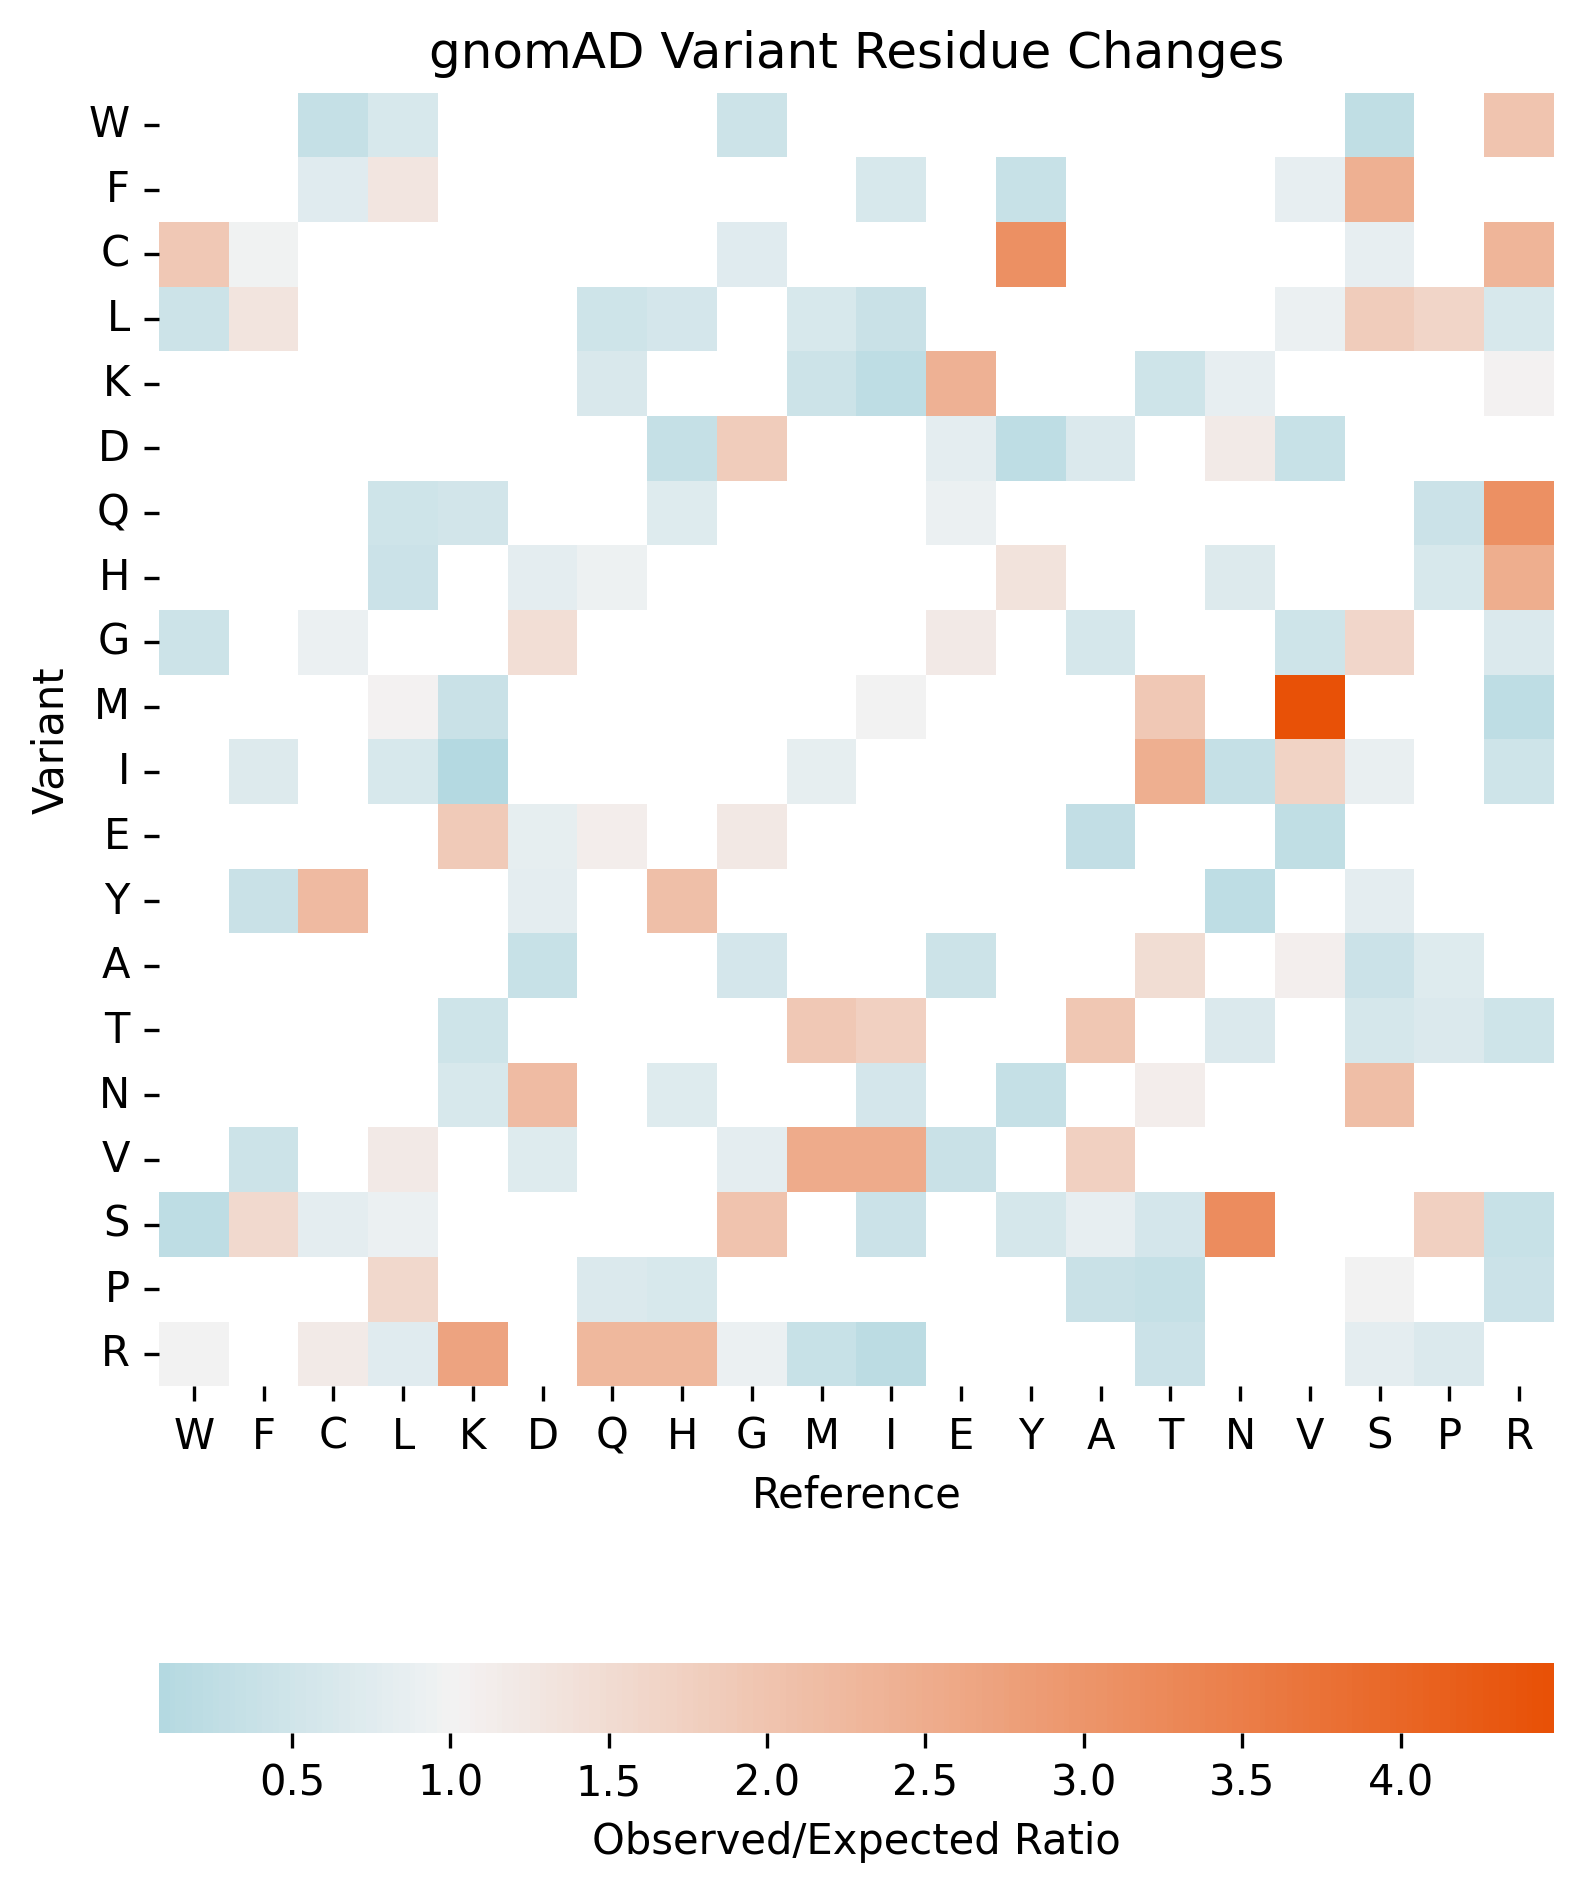

In [20]:
AA_order = chi_sq_p_vals.sort_values(by = "p_val", ascending = False)["orig_aa"]

pivot_results_df = pivot_results_df.reindex(AA_order, axis = 0)
pivot_results_df = pivot_results_df.reindex(AA_order, axis = 1)

fig, ax = plt.subplots(figsize=(6, 8), dpi = 300)

rdgn = sns.diverging_palette(h_neg=220, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
sns.heatmap(pivot_results_df, ax = ax, cmap = rdgn, center = 1, cbar_kws = dict(location="bottom", label = "Observed/Expected Ratio"))
plt.yticks(rotation = 0)

plt.title("gnomAD Variant Residue Changes");
plt.xlabel("Reference")
plt.ylabel("Variant");

In [22]:
results_df.to_csv("../output/gnomAD_residue_transition_count.csv")